In [37]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import re
import requests
import seaborn as sns
import numpy as np
import hvplot.pandas

In [38]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources\crypto_market_data.csv")

# Display sample data
market_data_df.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [40]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [41]:
market_data_df.dtypes

coin_id                          object
price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

### Prepare the Data

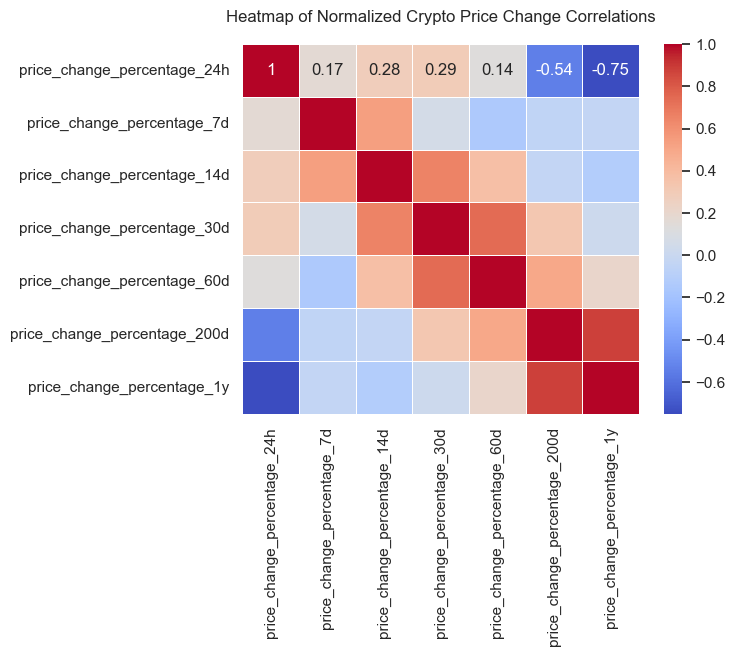

In [42]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df_numeric = market_data_df.drop(columns=['coin_id'])
scaler = StandardScaler()
market_data_df_scaled = scaler.fit_transform(market_data_df_numeric)
market_data_df_scaled_df = pd.DataFrame(market_data_df_scaled, columns=market_data_df_numeric.columns)
sns.set(style="whitegrid")
correlation_matrix = market_data_df_scaled_df.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
heatmap.set_title('Heatmap of Normalized Crypto Price Change Correlations', pad=16)
heatmap.figure.savefig('heatmap_normalized_crypto_price_changes.png')

In [43]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
scaled_data_df = pd.DataFrame(market_data_df_scaled, columns=market_data_df_numeric.columns)
scaled_data_df['coin_id'] = market_data_df['coin_id']
scaled_data_df.set_index('coin_id', inplace=True)
print(scaled_data_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

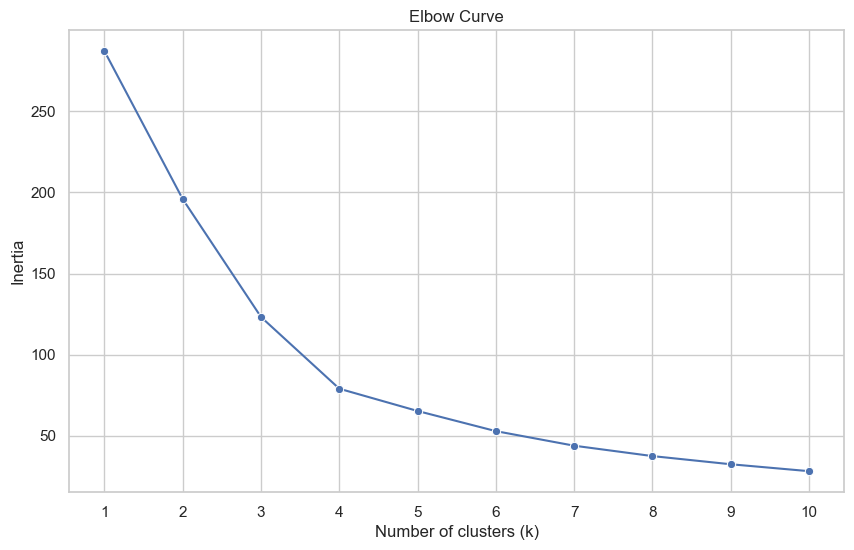

   k     inertia
0  1  287.000000
1  2  195.820218
2  3  123.190482
3  4   79.022435
4  5   65.302379


In [44]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame
k_values = range(1, 11)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data_df)
    inertia_values.append(kmeans.inertia_)

elbow_data = {'k': k_values, 'inertia': inertia_values}
elbow_df = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 6))
sns.lineplot(data=elbow_df, x='k', y='inertia', marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print(elbow_df.head())

c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

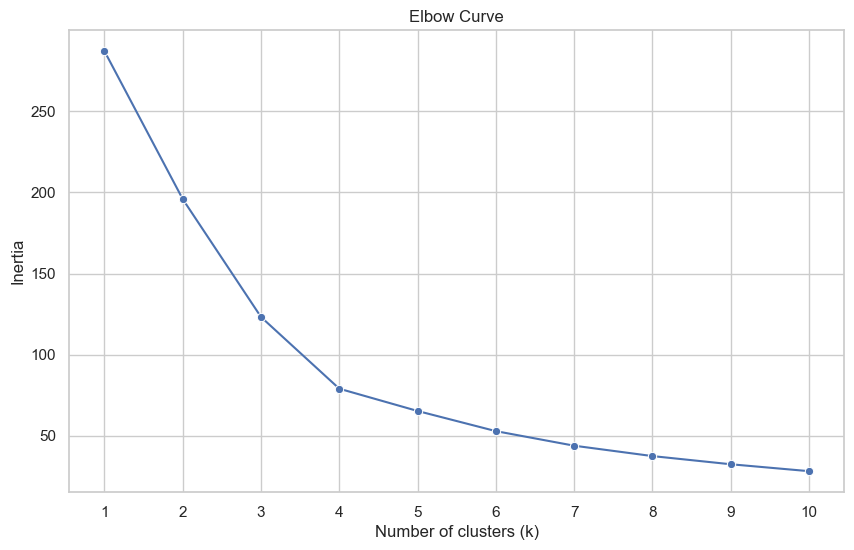

   k     inertia
0  1  287.000000
1  2  195.820218
2  3  123.190482
3  4   79.022435
4  5   65.302379


In [45]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
k_values = range(1, 11)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data_df)
    inertia_values.append(kmeans.inertia_)

elbow_data = {'k': k_values, 'inertia': inertia_values}
elbow_df = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 6))
sns.lineplot(data=elbow_df, x='k', y='inertia', marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print(elbow_df.head())

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**


In [46]:
def find_best_k(inertia_values):
    second_derivative = np.diff(inertia_values, 2)
    elbow_index = np.argmax(second_derivative) + 1
    return k_values[elbow_index]
best_k = find_best_k(inertia_values)
print(f"The best value for k is: {best_k}")

The best value for k is: 4


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [47]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

In [48]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data_df)

c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [49]:
# Predict the clusters to group the cryptocurrencies using the scaled data


# View the resulting array of cluster values.
kmeans_model.fit(scaled_data_df)
cluster_labels = kmeans_model.predict(scaled_data_df)
market_data_df['cluster'] = cluster_labels
print(market_data_df.head())

c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185                      83.51840   
1                    -12.88890      

In [50]:
# Create a copy of the DataFrame
market_data_df_copy = market_data_df.copy()
print(market_data_df_copy.head())

        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185                      83.51840   
1                    -12.88890      

In [51]:
# Add a new column to the DataFrame with the predicted clusters

# Display sample data
cluster_labels = kmeans_model.predict(scaled_data_df)
market_data_df['cluster'] = cluster_labels
print(market_data_df.head())

        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185                      83.51840   
1                    -12.88890      

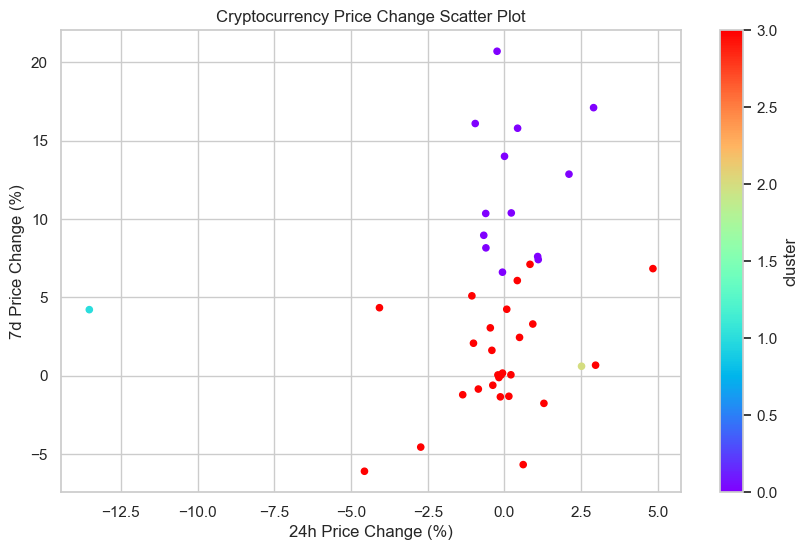

In [52]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='cluster',
    colormap='rainbow',
    figsize=(10, 6),
    colorbar=True,
    title='Cryptocurrency Price Change Scatter Plot'
)
plt.xlabel('24h Price Change (%)')
plt.ylabel('7d Price Change (%)')
plt.grid(True)
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [53]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [54]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca.fit(scaled_data_df)
pca_transformed_data = pca.transform(scaled_data_df)
pca_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = cluster_labels

# View the first five rows of the DataFrame. 
print(pca_df.head())

        PC1       PC2       PC3  cluster
0 -0.600667  0.842760  0.461595        0
1 -0.458261  0.458466  0.952877        0
2 -0.433070 -0.168126 -0.641752        3
3 -0.471835 -0.222660 -0.479053        3
4 -1.157800  2.041209  1.859715        0


In [55]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame(explained_variance, index=['PC1', 'PC2', 'PC3'], columns=['Explained Variance'])
print(explained_variance_df)

     Explained Variance
PC1            0.371986
PC2            0.347008
PC3            0.176038


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [56]:
total_explained_variance = explained_variance.sum()
print(f"The total explained variance of the three principal components is: {total_explained_variance}")

The total explained variance of the three principal components is: 0.895031657030984


In [57]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
pca_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = cluster_labels
pca_df['coin_id'] = market_data_df.index
pca_df.set_index('coin_id', inplace=True)
print(pca_df.head())


              PC1       PC2       PC3  cluster
coin_id                                       
0       -0.600667  0.842760  0.461595        0
1       -0.458261  0.458466  0.952877        0
2       -0.433070 -0.168126 -0.641752        3
3       -0.471835 -0.222660 -0.479053        3
4       -1.157800  2.041209  1.859715        0


### Find the Best Value for k Using the PCA Data

In [58]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame
k_values = range(1, 11)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])
    inertia_values.append(kmeans.inertia_)
elbow_data = {'k': k_values, 'inertia': inertia_values}
elbow_df = pd.DataFrame(elbow_data)
print(elbow_df)

c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

    k     inertia
0   1  256.874086
1   2  165.901994
2   3   93.774626
3   4   49.665497
4   5   37.878747
5   6   27.618972
6   7   21.182776
7   8   17.389823
8   9   13.593650
9  10   10.559358


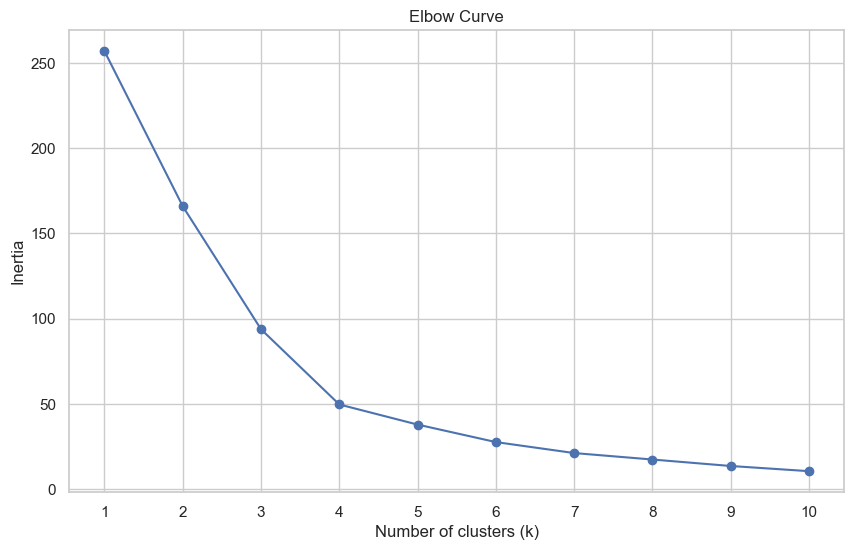

    k     inertia
0   1  256.874086
1   2  165.901994
2   3   93.774626
3   4   49.665497
4   5   37.878747
5   6   27.618972
6   7   21.182776
7   8   17.389823
8   9   13.593650
9  10   10.559358


In [59]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print(elbow_df)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [60]:
best_k_pca = 4  
best_k_original = 4 

print(f"The best value for k when using the PCA data is: {best_k_pca}")
print(f"Does it differ from the best k value found using the original data? {'No' if best_k_pca == best_k_original else 'Yes'}")

The best value for k when using the PCA data is: 4
Does it differ from the best k value found using the original data? No


In [61]:
# Initialize the K-Means model using the best value for k
kmeans_model_pca = KMeans(n_clusters=4, random_state=0)

In [62]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(pca_df[['PC1', 'PC2', 'PC3']])

c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rando\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [64]:
# Predict the clusters to group the cryptocurrencies using the PCA data
print("Cluster centers (PCA Data):")

# Print the resulting array of cluster values.
print(kmeans_model_pca.cluster_centers_)

Cluster centers (PCA Data):
[[-0.51072664  0.84722621  1.16731549]
 [ 8.08901821 -3.89689054  2.30138208]
 [ 4.7923954   6.76767868 -1.98698545]
 [-0.24007567 -0.53402803 -0.59574992]]


In [65]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data
pca_df_copy = pca_df.copy()
pca_df_copy['cluster'] = kmeans_model_pca.labels_
print(pca_df_copy.head())

              PC1       PC2       PC3  cluster
coin_id                                       
0       -0.600667  0.842760  0.461595        0
1       -0.458261  0.458466  0.952877        0
2       -0.433070 -0.168126 -0.641752        3
3       -0.471835 -0.222660 -0.479053        3
4       -1.157800  2.041209  1.859715        0


In [66]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_df_copy.rename(columns={'PC1': 'PCA1', 'PC2': 'PCA2'}, inplace=True)
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='cluster',
    hover_cols=['PCA3'],
    title='Scatter Plot of PCA Components'
)
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [PCA1]   (PCA2)

### Determine the Weights of Each Feature on each Principal Component

In [67]:
# Use the columns from the original scaled DataFrame as the index.
pca_df_copy['coin_id'] = scaled_data_df.index
pca_df_copy.set_index('coin_id', inplace=True)

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    

In [69]:
pca_components = pca.components_
pca_loadings_df = pd.DataFrame(pca_components.T, index=scaled_data_df.columns, columns=['PC1', 'PC2', 'PC3'])
print(pca_loadings_df)
strongest_influences = pca_loadings_df.apply(lambda x: x.abs().sort_values(ascending=False).head(1), axis=0)
print("\nStrongest influences on each component:")
print(strongest_influences)

                                   PC1       PC2       PC3
price_change_percentage_24h  -0.416728  0.358162 -0.218795
price_change_percentage_7d   -0.102432  0.227432  0.787670
price_change_percentage_14d  -0.009162  0.540415  0.349534
price_change_percentage_30d   0.191523  0.562182 -0.181744
price_change_percentage_60d   0.320365  0.434040 -0.361377
price_change_percentage_200d  0.594468  0.027735  0.039733
price_change_percentage_1y    0.568379 -0.150789  0.210541

Strongest influences on each component:
                                   PC1       PC2      PC3
price_change_percentage_200d  0.594468       NaN      NaN
price_change_percentage_30d        NaN  0.562182      NaN
price_change_percentage_7d         NaN       NaN  0.78767
